<a href="https://colab.research.google.com/github/anantaYSR/PA_Kecerdasasn-Buatan/blob/main/Kelompok1_A1_21(testting2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                                           Image Processing 5 Hewan Mamalia

                                                       Kelompok 1 
                                                      Kelas A1 2021
⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅
#####Anggota Kelompok :
#####Bayu Abdurosyid - 2109106003
#####Alif Maulana Setyawan  - 2109106002
#####Ananta Yusra Putra.A - 2109106024


In [ ]:
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import shutil
import subprocess as sbp
import pathlib
import splitfolders
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as py
import seaborn as sns
import pandas as pd
import os

from tensorflow.keras import utils
from google.colab import files
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!gdown 1XoQ89zByrMdTdsq2D9Z63o9X9V1LkDca

Downloading...
From: https://drive.google.com/uc?id=1XoQ89zByrMdTdsq2D9Z63o9X9V1LkDca
To: /content/dataset.zip
100% 935M/935M [00:10<00:00, 91.8MB/s]


In [ ]:
!unzip '/content/dataset.zip' 

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: dataset/HORSE/images521.jpg  
  inflating: dataset/HORSE/images522.jpg  
  inflating: dataset/HORSE/images523.jpg  
  inflating: dataset/HORSE/images524.jpg  
  inflating: dataset/HORSE/images525.jpg  
  inflating: dataset/HORSE/images526.jpg  
  inflating: dataset/HORSE/images527.jpg  
  inflating: dataset/HORSE/images528.jpg  
  inflating: dataset/HORSE/images529.jpg  
  inflating: dataset/HORSE/images530.jpg  
  inflating: dataset/HORSE/images531.jpg  
  inflating: dataset/HORSE/images532.jpg  
  inflating: dataset/HORSE/images533.jpg  
  inflating: dataset/HORSE/images534.jpg  
  inflating: dataset/HORSE/images535.jpg  
  inflating: dataset/HORSE/images536.jpg  
  inflating: dataset/HORSE/images537.jpg  
  inflating: dataset/HORSE/images538.jpg  
  inflating: dataset/HORSE/images539.jpg  
  inflating: dataset/HORSE/images540.jpg  
  inflating: dataset/HORSE/images541.jpg  
  inflating: dataset/HORSE/images542.j

In [ ]:
#%rm -rf '/content/dataset'

In [ ]:
class_names = ['elephant', 'horse', 'lion', 'cat', 'dog']

In [ ]:
dir = '/content/dataset'
os.listdir(dir)

['HORSE', 'ELEPHANT', 'cat', 'LION', 'dog']

In [ ]:
splitfolders.ratio(dir, output = dir, ratio = (.8, .2))
train_dir = os.path.join(dir, 'train')
validation_dir = os.path.join(dir, 'val')

Copying files: 14996 files [00:06, 2447.62 files/s]


### Sebelum Aigmentasi

In [ ]:
w = 64
h = 64

datagenbefore = ImageDataGenerator(
    rescale = 1./255
)
train_before = datagenbefore.flow_from_directory(
    '/content/dataset/train',
    class_mode='categorical',
    subset = 'training',
    target_size = (w, h),
    batch_size = 256
)

Found 11995 images belonging to 5 classes.


In [ ]:
elephant = 0
horse = 0
lion = 0
cat = 0
dog = 0

array =  [ 
          '/content/dataset/ELEPHANT', 
          '/content/dataset/HORSE', 
          '/content/dataset/LION', 
          '/content/dataset/cat', 
          '/content/dataset/dog'
          ]

for path in os.scandir(array[0]):
  if path.is_file():
    elephant += 1
for path in os.scandir(array[1]):
  if path.is_file():
    horse += 1
for path in os.scandir(array[2]):
  if path.is_file():
    lion += 1
for path in os.scandir(array[3]):
  if path.is_file():
    cat += 1
for path in os.scandir(array[4]):
  if path.is_file():
    dog += 1

print('file count:', elephant)
print('file count:', horse)
print('file count:', lion)
print('file count:', cat)
print('file count:', dog)

animal = ['elephant', 'horse', 'lion', 'cat', 'dog']
count = [elephant, horse, lion, cat, dog]

file count: 3039
file count: 3009
file count: 2984
file count: 3037
file count: 2927


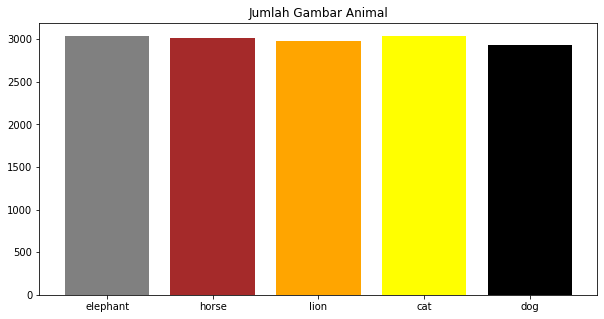

In [ ]:
x = animal
y = count

plt.figure(figsize = (10,5))
plt.bar(x, y, color=['gray', 'brown', 'orange', 'yellow', 'black'])
plt.title("Jumlah Gambar Animal")
# plt.legend
plt.show()

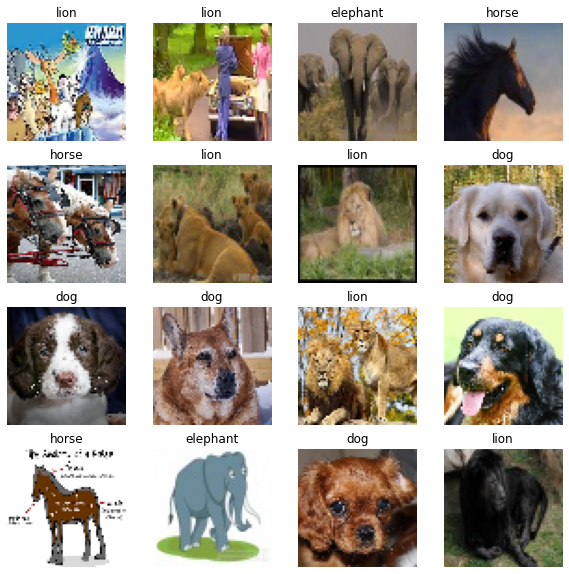

In [ ]:
plt.figure(figsize=(10, 10))

images, labels = train_before.next()

for i in range (16):
  plt.subplot(4, 4, i+1)
  plt.imshow(train_before[0][0][i])
  plt.title(class_names[tf.argmax(labels[i])])
  plt.axis('off')

### Augmentasi Gambar

In [ ]:
datagen = ImageDataGenerator(
    rescale = 1./255,
    fill_mode = 'nearest',
    horizontal_flip = True,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.15,
)

In [ ]:
w = 150
h = 150

train_dataset = datagen.flow_from_directory(
    '/content/dataset/train',
    class_mode='categorical',
    target_size = (w, h),
    batch_size = 256
)

validation_dataset = datagen.flow_from_directory(
    '/content/dataset/val',
    class_mode='categorical',
    target_size = (w, h),
    batch_size = 256
)

Found 11995 images belonging to 5 classes.
Found 3000 images belonging to 5 classes.


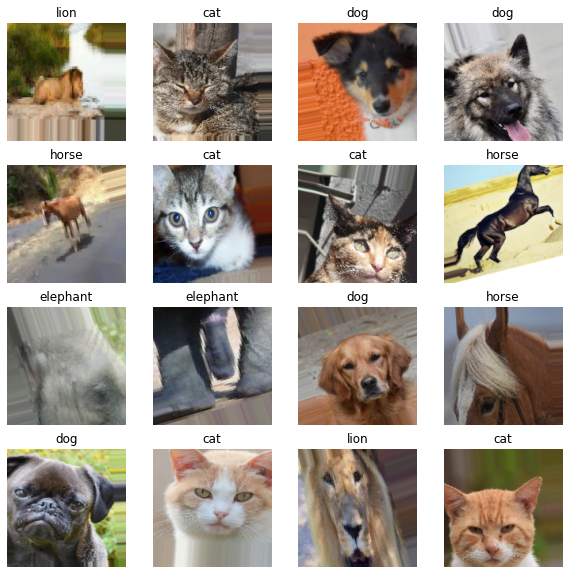

In [ ]:
plt.figure(figsize=(10, 10))

images, labels = train_dataset.next()

for i in range (16):
  plt.subplot(4, 4, i+1)
  plt.imshow(train_dataset[0][0][i])
  plt.title(class_names[tf.argmax(labels[i])])
  plt.axis('off')

In [ ]:
model = Sequential(
    [
    layers.Conv2D(64, (3,3), activation='relu', input_shape=(w, h, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.5),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(512, activation = 'relu'),
    layers.Dense(256, activation = 'relu'),
    layers.Dense(5, activation = 'softmax')
    ]
)

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 36, 36, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       7

In [ ]:
class callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epocj, logs = None):
    if (logs.get('accuracy') > 0.98 and logs.get('val_accuracy') > 0.98):
      print('Akurasi telah mencapai 98%!')
      self.model.stop_training = True

In [ ]:
# steps_per_epoch = len(train_dataset)//batch_size

# validation_steps = len(validation_data)//batch_size

In [ ]:
history = model.fit(
    train_dataset,
    validation_data = validation_dataset,
    validation_steps = 5,
    epochs = 30,
    callbacks = [callback()]    
)

Epoch 1/30
47/47 [==============================] - 131s 3s/step - loss: 1.5812 - accuracy: 0.2820 - val_loss: 1.4920 - val_accuracy: 0.3586
Epoch 2/30
47/47 [==============================] - 115s 2s/step - loss: 1.4315 - accuracy: 0.3930 - val_loss: 1.3613 - val_accuracy: 0.4070
Epoch 3/30
47/47 [==============================] - 116s 2s/step - loss: 1.2654 - accuracy: 0.4779 - val_loss: 1.2408 - val_accuracy: 0.5031
Epoch 4/30
47/47 [==============================] - 114s 2s/step - loss: 1.0977 - accuracy: 0.5526 - val_loss: 1.0238 - val_accuracy: 0.5898
Epoch 5/30
47/47 [==============================] - 115s 2s/step - loss: 0.9529 - accuracy: 0.6183 - val_loss: 0.8874 - val_accuracy: 0.6484
Epoch 6/30
47/47 [==============================] - 113s 2s/step - loss: 0.9203 - accuracy: 0.6374 - val_loss: 0.9707 - val_accuracy: 0.6289
Epoch 7/30
47/47 [==============================] - 113s 2s/step - loss: 0.8022 - accuracy: 0.6836 - val_loss: 0.7078 - val_accuracy: 0.7180
Epoch 8/30
47

In [ ]:
# saving and loading the .h5 model
 
# save model
model.save('gfgModel.h5')
print('Model Saved!')

Model Saved!


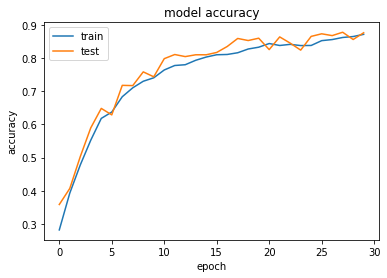

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

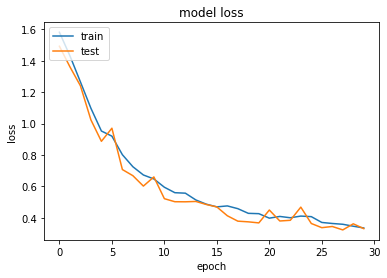

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(validation_dataset)

12/12 [==============================] - 25s 2s/step - loss: 0.3179 - accuracy: 0.8750


[0.31787076592445374, 0.875]

In [42]:
new_model = tf.keras.models.load_model('gfgModel.h5')
new_model.predict(train_dataset[0][0])

8/8 [==============================] - 0s 18ms/step


array([[8.74181867e-01, 5.75620383e-02, 6.75880909e-02, 1.39729280e-04,
        5.28208097e-04],
       [5.62656760e-06, 8.40979978e-04, 1.27098365e-05, 1.35415625e-02,
        9.85599160e-01],
       [1.80952460e-01, 2.72174805e-01, 5.45835197e-01, 1.28439773e-04,
        9.09063441e-04],
       ...,
       [8.99731815e-02, 8.85604322e-01, 2.43593808e-02, 3.59737278e-05,
        2.71562858e-05],
       [1.34598119e-02, 3.16290651e-04, 9.86223042e-01, 1.87251374e-07,
        5.54603332e-07],
       [5.96943796e-01, 5.16068898e-02, 3.51386428e-01, 8.77609909e-06,
        5.40849178e-05]], dtype=float32)

Saving kuda.jpg to kuda (1).jpg
1/1 [==============================] - 0s 28ms/step
horse


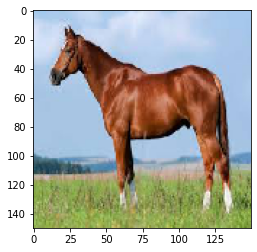

In [43]:
gambar = files.upload()

for dir in gambar.keys():

    img = image.load_img(dir, target_size = (w, h))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = py.expand_dims(x, axis = 0)

    img = utils.load_img(
        dir, target_size = (w, h)
    )

    img_array = utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) 

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    print("{}" .format(class_names[py.argmax(score)]))




    # yusra